<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1:-Win/Lose-Game" data-toc-modified-id="Q1:-Win/Lose-Game-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Q1: Win/Lose Game</a></span></li><li><span><a href="#Q2:-Birthday-Problem" data-toc-modified-id="Q2:-Birthday-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Q2: Birthday Problem</a></span></li></ul></div>

# Q1: Win/Lose Game

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import abc

In [2]:
def winorlost(trials):
    win=0
    dice1=[None]*trials
    dice2=[None]*trials
    probability=[None]*trials
    for i in range(trials):
        dice1[i]=np.random.randint(1,6)
        dice2[i]=np.random.randint(1,6)
        sum_dice=dice1[i]+dice2[i]
        if((sum_dice==7) or (sum_dice==11)):
            win+=1
        elif((sum_dice==2) or (sum_dice==3) or (sum_dice==12)):
            win+=0
        else:
            n_win=win
            while n_win==win :#until we havent reach a new win or lost
                n_dice1=[]
                n_dice2=[]
                n_dice1.append(np.random.randint(1,6))
                n_dice2.append(np.random.randint(1,6))
                if (n_dice1[-1]+n_dice2[-1]==sum_dice):
                    win+=1
                    break
                elif(n_dice1[-1]+n_dice2[-1]==7):
                    break
                else:
                    continue
        p=win/(i+1)
        probability[i]=p
    return probability

In [3]:
def RE(p):#Relative Eror function
    print("your win probabilty in this number of trials is:",p[-1])
    theoric_probability=0.492929
    relative_eror=abs((theoric_probability-p[-1])/theoric_probability)
    print("relative_eror is:",relative_eror)
    return relative_eror

def plot(result,trials):
    x=range(1,trials+1,1)
    y=np.array(result)
    plt.figure()
    plt.plot(x,y,'b',label='win_probability')
    plt.title('Plotter')
    plt.xlabel('trials')
    plt.ylabel('win_probability')
    plt.axhline(y=0.492929, linestyle=":", color="red")
    plt.show()

Your trials?1000
your win probabilty in this number of trials is: 0.479
relative_eror is: 0.028257619251454112


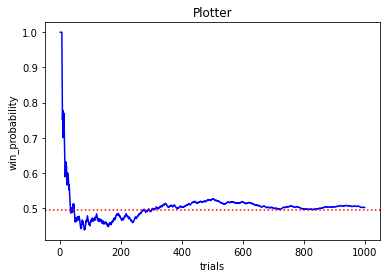

In [4]:
trials=int(input('Your trials?'))

RE(winorlost(trials))

plot(winorlost(trials),trials)

# Q2: Birthday Problem

In [5]:
import random
from matplotlib import pyplot as plt
import numpy as np

In [9]:
def birthday(n,k,trials):
    result=0
    player=[None]*k
    for _ in range(trials):
        for i in range(k):
            player[i]=np.random.randint(1,n)
        repeats=k-len(set(player))
        if(repeats==1):#if repeats==1 we have just 2 player born in same day
            result+=1
    p=result/trials
    return p

In [10]:
def plotter(n,k,trials):
    x=range(1,k+1,1)
    p=[]
    for j in range(k):
        p.append(birthday(n,j,trials))
    y=np.array(p)
    plt.figure()
    plt.plot(x,y,'r',label='Same_probability')
    plt.title('Plotter')
    plt.xlabel('Number of Players')
    plt.ylabel('Same_probability')
    plt.show()#Drawing the plotter takes a bit time

n=365
k=80
trials=5000
probability= 0.0012


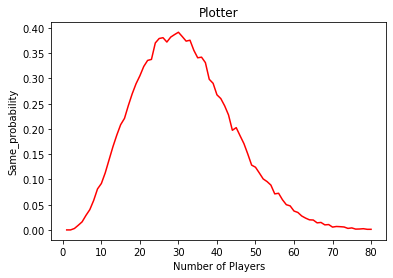

In [11]:
n=int(input('n='))#days
k=int(input('k='))#players
trials=int(input('trials='))#for part1:n=365,k=23/part3:n=365,k=80

print("probability=",birthday(n,k,trials))
plotter(n,k,trials)